# Problem 1 - Model Predictive Control

Creates the Quadrotor object and loads in the animation code.

**Re-run this block anytime you make change to `quadrotor.py`.**

## Simulate the quadrotor using MPC as the controller


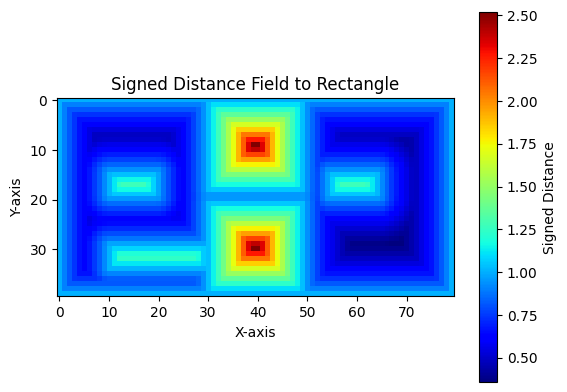

In [3]:
import torch
from lqrrt import PathPlannerLQRRT

from quadrotor import QuadrotorPendulum
from animation import Animation

from world import SignedDistanceField
import matplotlib.pyplot as plt

import numpy as np

# Weights of LQR cost
R = np.eye(2)
Q = np.diag([10, 10, 1, 1, 1, 1, 1, 1])
Qf = Q

# End time of the simulation
tf = 10

# Construct our quadrotor controller 
x0 = np.array([2, 3, 0, 0, 0, 0, 0, 0])
xf = np.array([6, 3, 0, 0, 0, 0, 0, 0])
quadrotor = QuadrotorPendulum(Q, R, Qf, xf, input_max=30)
sdf = SignedDistanceField("./configs/world_complex.yaml", gamma=1)

with torch.no_grad():
    sdf.plot_barrier()

sdf.plot_obs(plt.gca())
plt.axis('equal')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bc24b42c-2384-48c3-b1e2-6f6c0205f5f5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [1]:
import torch
from lqrrt import PathPlannerLQRRT

from quadrotor import QuadrotorPendulum
from animation import Animation

from world import SignedDistanceField
import matplotlib.pyplot as plt

import numpy as np

R = np.eye(2)
Q = np.diag([10, 10, 1, 1, 1, 1, 1, 1])
Qf = Q

# End time of the simulation
xf = np.array([6, 3, 0, 0, 0, 0, 0, 0])
quadrotor = QuadrotorPendulum(Q, R, Qf, xf, input_max=30)
sdf = SignedDistanceField("./configs/world.yaml", gamma=1)

rrt = PathPlannerLQRRT("./configs/lqrrt.yaml", quadrotor, sdf)
planner = rrt.get_planner()
x, u = rrt.get_trajectory(planner)

print(np.array(planner.x_seq[:3]) - x[:3])

anime = Animation(quadrotor, sdf)
anime.set_trajectory(x)
anime.animate()


...planning...
Found plan at elapsed time: 3.057805 s
Tree size: 7
ETA: 123.3 s
lqr success rate: 37.50%
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-3.17851385e-04  1.12346861e-02  8.51627878e-02  1.18792142e-03
  -2.53995059e-02  4.49171583e-01  3.40651151e+00  9.48456232e-02]
 [-4.14078087e-03  3.39329528e-02  7.71226317e-02  1.53212530e-02
  -1.25472306e-01  4.57688152e-01 -3.72811776e+00  4.58728835e-01]]


In [2]:
anime = Animation(quadrotor, sdf)
anime.set_trajectory(np.array(planner.x_seq))
anime.animate()

In [2]:
from ilqr import iLQR

print(x.shape)
ilqr = iLQR("./configs/ilqr.yaml", rrt)
ilqr.calculate_optimal_trajectory(u, rrt.dt)

(1501, 8)
tensor(inf) [ 49.78728797 -81.24932422  -4.52983409  -4.61056626  11.07869215
 -52.57943338  -1.07423113  -0.65789473]
tensor(inf) [ 50.84612665 -86.56767565  -4.6372575   -4.65293308  10.09379524
 -53.75897716  -1.07423701  -0.27197216]
tensor(inf) [ 51.80558138 -91.99498595  -4.74468223  -4.68426068   9.09474541
 -54.75645692  -1.07425752  -0.45115016]
tensor(inf) [ 52.66543809 -97.51339601  -4.85210946  -4.75813209   8.10703445
 -55.58837645  -1.07428719  -1.06869503]
tensor(inf) [  53.42842717 -103.10921254   -4.95953989   -4.89813301    7.16122577
  -56.3171124    -1.0743214    -1.6900703 ]
tensor(inf) [  54.09907629 -108.7756526    -5.06697378   -5.08135738    6.25538872
  -57.00881127   -1.07435646   -1.87824684]
tensor(inf) [  54.67950928 -114.51017363   -5.17441109   -5.25445151    5.3511079
  -57.67423069   -1.07438962   -1.50044067]
tensor(inf) [  55.16918411 -120.30803299   -5.28185152   -5.3712229     4.44578033
  -58.26598971   -1.07441903   -0.82324085]
tensor(

([array([2, 3, 0, 0, 0, 0, 0, 0]),
  array([ 2.  ,  2.95,  0.  ,  0.  ,  0.  , -1.  ,  0.  ,  0.  ]),
  array([ 2.00057049e+00,  2.84726443e+00, -3.66619550e-02, -2.11268613e-03,
          2.26995774e-02, -1.05481163e+00, -7.33239099e-01, -8.36109851e-02]),
  array([ 2.00851081,  2.73950679, -0.12213193, -0.03035311,  0.15893167,
         -1.10244947, -0.97616046, -0.55055589]),
  array([ 2.03670666,  2.62643221, -0.22180666, -0.12184175,  0.42165649,
         -1.16637671, -1.017334  , -1.28918205]),
  array([ 2.09504428,  2.50477157, -0.32440426, -0.28197855,  0.74982947,
         -1.27501697, -1.03461814, -1.8425106 ]),
  array([ 2.18707273,  2.37057848, -0.42999853, -0.4714765 ,  1.09248158,
         -1.40955058, -1.07726723, -1.84336789]),
  array([ 2.31473188,  2.22332213, -0.54004582, -0.63257419,  1.47161961,
         -1.53423858, -1.12367853, -1.31525256]),
  array([ 2.48472865,  2.06339339, -0.65367231, -0.72978065,  1.94844617,
         -1.67305533, -1.14885133, -0.64939477])

In [ ]:
anime = Animation(quadrotor, sdf)
anime.set_trajectory(x)
anime.animate()

In [4]:
import importlib
import quadrotor_with_pendulum
importlib.reload(quadrotor_with_pendulum)
from quadrotor_with_pendulum import QuadrotorPendulum
from animation import Animation
from obstacles import Obstacles

import numpy as np

# Weights of LQR cost
R = np.eye(2)
Q = np.diag([10, 10, 1, 1, 1, 1, 1, 1])
Qf = Q

# End time of the simulation
tf = 10

# Construct our quadrotor controller 
x0 = np.array([2, 3, 0, 0, 0, 0, 0, 0])
xf = np.array([6, 3, 0, 0, 0, 0, 0, 0])
quadrotor = QuadrotorPendulum(Q, R, Qf, xf, input_max=30)
obstacles = Obstacles("./configs/world.yaml")

from trajectory_optimizer import TrajectoryOptimizer
optim = TrajectoryOptimizer(quadrotor)
x = np.load("./initial_guesses/x.npy")
t = np.load("./initial_guesses/t.npy")
u = np.load("./initial_guesses/u.npy")
print(x.shape, t.shape, u.shape)
init_traj = {"state": x, "input": u}
dt = t[1] - t[0]
x = optim.optimize_trajectory(x0, len(x), dt, obstacles, initial_traj=init_traj)

(127, 8) (127,) (127, 2)


TypeError: must be real number, not pydrake.symbolic.Variable

In [2]:
anime = Animation(quadrotor, obstacles)
anime.set_trajectory(x)
anime.animate()